# Trabalho de Processamento de Linguagem Natural




##### Professor: Alex 

##### Alunos: Cauã, Lucas Leal, Isaac e Pedro Lopes










## Instalando bibliotecas que serão utilizadas

In [40]:
!pip install -r requirements.txt

## Preparação do Corpus e Pré-Processamento
* Atividade:

    * Carregar o corpus de poesias de Fernando Pessoa em um Jupyter Notebook.
    * Realizar tokenização de sentenças e palavras.
    * Remover stopwords e pontuação para facilitar a análise.
    * Criar uma nuvem de palavras (WordCloud) para visualizar termos mais frequentes.

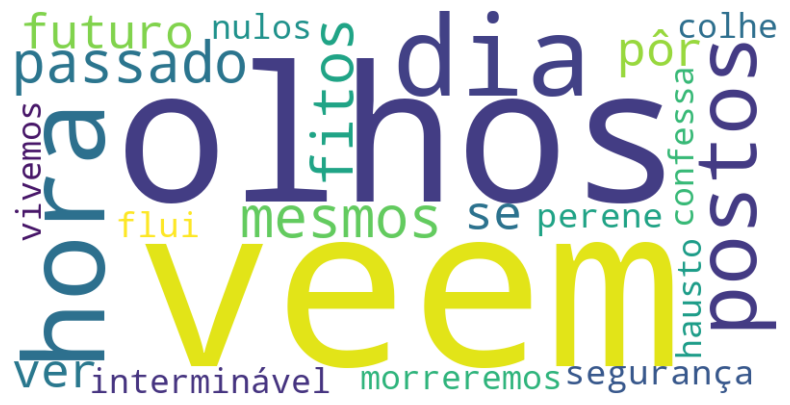

In [ ]:
import spacy # Importar a biblioteca spaCy para processamento de linguagem natural
import matplotlib.pyplot as plt # Importar a biblioteca Matplotlib para visualização de dados
from wordcloud import WordCloud # Importar a biblioteca WordCloud para criação de nuvens de palavras

# Carregar o modelo de português do spaCy
nlp = spacy.load("pt_core_news_sm")

# Texto de exemplo (substituir pelo corpus real)
corpus = """Uns, com os olhos postos no passado,
Veem o que não veem; outros, fitos
Os mesmos olhos no futuro, veem
O que não pode ver-se.Porque tão longe ir pôr o que está perto —
A segurança nossa? Este é o dia,
Esta é a hora, este o momento, isto
É quem somos, e é tudo.Perene flui a interminável hora
Que nos confessa nulos. No mesmo hausto
Em que vivemos, morreremos. Colhe
O dia, porque és ele."""

# Processar o texto
doc = nlp(corpus)

# Filtrar palavras sem stopwords e pontuação
tokens_filtrados = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and token.text.strip()]

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(tokens_filtrados))

# Mostrar a nuvem de palavras
plt.figure(figsize=(10,5)) # Definir tamanho da figura
plt.imshow(wordcloud, interpolation="bilinear") # Exibir a nuvem de palavras
plt.axis("off") # Ocultar eixos
plt.show() # Exibir a nuvem de palavras

## Análise Estatística de Vocabulário
* Atividade:
    * Contar frequência de palavras e identificar os termos mais recorrentes.
    * Comparar o uso de substantivos, verbos e adjetivos na obra.
    * Criar um gráfico de distribuição de palavras.
* Código de exemplo:

C:\Users\cauac\AppData\Local\Temp\ipykernel_27724\3852064294.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Frequência", y="Palavras", data=df_frequencia, palette="Blues_r") # Barplot


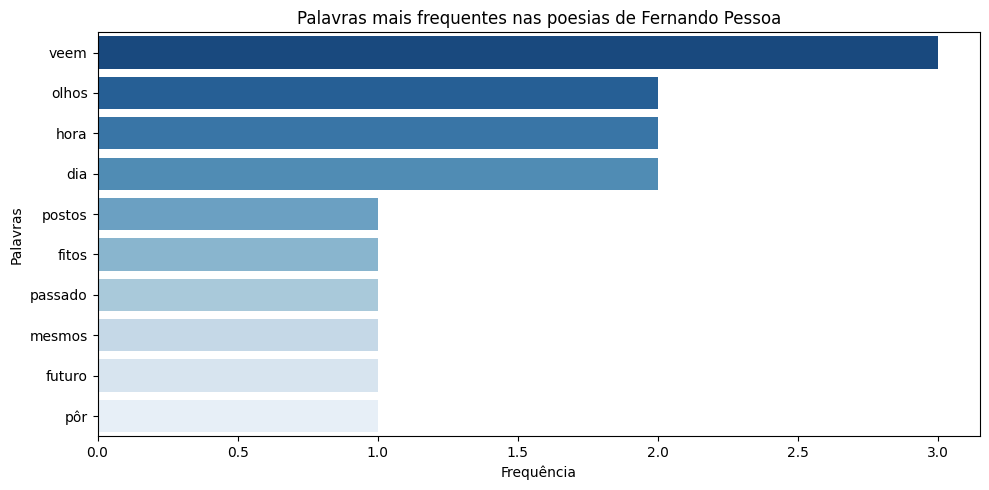

In [ ]:
from collections import Counter # Importar a função Counter para contar a frequência das palavras
import pandas as pd # Criar DataFrame para visualização
import seaborn as sns # Importar a biblioteca Seaborn para visualização

# Contar a frequência das palavras
frequencia = Counter(tokens_filtrados)

# Criar DataFrame com as palavras mais frequentes
df_frequencia = pd.DataFrame(frequencia.items(), columns=["Palavras", "Frequência"]).sort_values(by="Frequência", ascending=False).head(10)

# Plotar gráfico de barras
plt.figure(figsize=(10, 5)) # Tamanho do gráfico
ax = sns.barplot(x="Frequência", y="Palavras", data=df_frequencia, palette="Blues_r") # Barplot
plt.xlabel("Frequência") # Legenda do eixo X
plt.ylabel("Palavras") # Legenda do eixo Y
plt.title("Palavras mais frequentes nas poesias de Fernando Pessoa") # Título do gráfico
plt.tight_layout() # Ajustar o layout
plt.show() # Mostrar o gráfico

# Análise Sintática e Estilística
* Atividade:
    * Aplicar POS-Tagging (Etiquetagem Gramatical).
    * Comparar a estrutura gramatical das poesias.
    * Criar um histograma da frequência de diferentes classes gramaticais.
* Código de exemplo:

C:\Users\cauac\AppData\Local\Temp\ipykernel_27724\1853726204.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequência", y="POS", data=df_pos, palette="Purples_r")  # Gráfico de barras


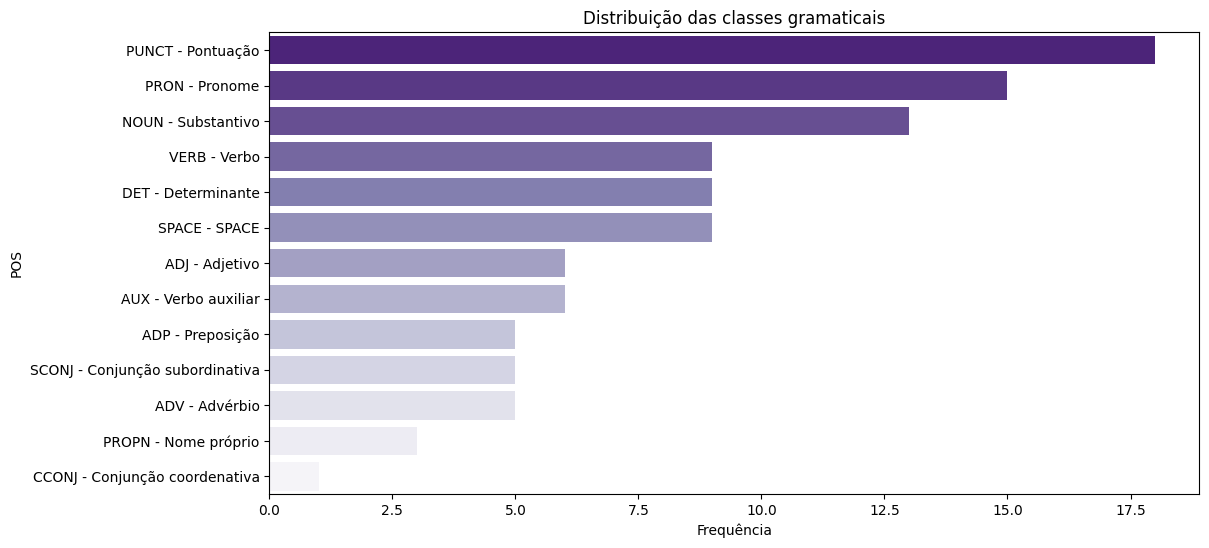

In [46]:
#Extrair classes gramaticais
pos_tags = [token.pos_ for token in doc]

# Contar a frequência de cada classe gramatical
contagem_pos = Counter(pos_tags)

# Mapeamento das classes gramaticais
pos_mapping = {
    "ADJ": "Adjetivo",
    "ADP": "Preposição",
    "ADV": "Advérbio",
    "AUX": "Verbo auxiliar",
    "CCONJ": "Conjunção coordenativa",
    "DET": "Determinante",
    "NOUN": "Substantivo",
    "NUM": "Numeral",
    "PART": "Partícula",
    "PRON": "Pronome",
    "PROPN": "Nome próprio",
    "PUNCT": "Pontuação",
    "SCONJ": "Conjunção subordinativa",
    "SYM": "Símbolo",
    "VERB": "Verbo",
    "X": "Outro"
}

# Substituir os POS pelo mapeamento com a abreviação e a descrição completa
mapped_pos = [f"{pos} - {pos_mapping.get(pos, pos)}" for pos in pos_tags]

# Contar novamente com os mapeamentos
contagem_pos_mapped = Counter(mapped_pos)

# Criar DataFrame para visualização
df_pos = pd.DataFrame(contagem_pos_mapped.items(), columns=["POS", "Frequência"]).sort_values(by="Frequência", ascending=False)

# Plotar gráfico de barras com tamanho maior
plt.figure(figsize=(12, 6))  # Aumentar o tamanho da figura
sns.barplot(x="Frequência", y="POS", data=df_pos, palette="Purples_r")  # Gráfico de barras
plt.xlabel("Frequência")  # Legenda do eixo x
plt.ylabel("POS")  # Legenda do eixo y
plt.title("Distribuição das classes gramaticais")  # Título do gráfico
plt.show()  # Exibir gráfico